# 分句

In [127]:
import pandas as pd
import json
import re
import requests

In [148]:
df = pd.read_csv('result.csv', encoding='gb18030')
df.head()

,sku_id,title,product_url,content,score,referenceName
0,100014352501,Apple iPhone 13 (A2634) 256GB 午夜色 支持移动联通电信5G 双...,https://item.jd.com/100014352501.html,哇哦，真的是一款很不错的手机，手感非常舒服，握持感非常舒服，\r\n外形外观：漂亮的！\r\...,5,Apple iPhone 13 (A2634) 256GB 午夜色 支持移动联通电信5G 双...
1,100014352501,Apple iPhone 13 (A2634) 256GB 午夜色 支持移动联通电信5G 双...,https://item.jd.com/100014352501.html,iPhone 13手机很快就拿到了，打开非常的惊喜呀，非常大气的13手机。我买的是128GB...,5,Apple iPhone 13 (A2634) 256GB 午夜色 支持移动联通电信5G 双...
2,100014352501,Apple iPhone 13 (A2634) 256GB 午夜色 支持移动联通电信5G 双...,https://item.jd.com/100014352501.html,外形外观：颜值很高\r\n屏幕音效：声音比之前的苹果手机大 ，音效很好\r\n拍照效果：清晰...,5,Apple iPhone 13 (A2634) 256GB 午夜色 支持移动联通电信5G 双...
3,100014352501,Apple iPhone 13 (A2634) 256GB 午夜色 支持移动联通电信5G 双...,https://item.jd.com/100014352501.html,Apple iPhone 13手机收到了，还是喜欢苹果的系统，用起来更加的流畅。平时很喜欢玩...,5,Apple iPhone 13 (A2634) 256GB 午夜色 支持移动联通电信5G 双...
4,100014352501,Apple iPhone 13 (A2634) 256GB 午夜色 支持移动联通电信5G 双...,https://item.jd.com/100014352501.html,iPhone 13手机果然没让我失望，最爱的拍照效果如期待的一样好，晚上拍起来也很清楚，之前...,5,Apple iPhone 13 (A2634) 256GB 午夜色 支持移动联通电信5G 双...


In [160]:
split_pattern = re.compile("([\r\n!！,，。.?？……;；])")
def split_sentence(sentence, max_len=32):
    result = split_pattern.split(sentence)
    final_result = []
    cur_sentence = ""
    prev_split = False
    for idx, item in enumerate(result):
        if not item or re.fullmatch('[\r\n]', item):
            continue
        elif re.fullmatch('[!！。?？……;；]', item):
            if not cur_sentence:
                continue
            cur_sentence += item
#             final_result.append(cur_sentence)
#             cur_sentence = ""
            prev_split = True
        elif re.fullmatch('[,，]', item):
            cur_sentence += item
            
        else:
            if prev_split or len(cur_sentence) > 32:
                final_result.append(cur_sentence)
                cur_sentence = ""
            cur_sentence += item
            prev_split = False
    if cur_sentence:
        final_result.append(cur_sentence)
                    
    return final_result

df['split_sentence'] = df['content'].apply(split_sentence)

In [159]:
# df.to_excel("./result_splited.xlsx", index=False, encoding="gb18030", engine="openpyxl")
# df = pd.read_excel("./result_splited.xlsx", encoding="gb18030")
# df[~df['split_sentence'].apply(lambda x: isinstance(x, str))]
# df['split_sentence'] = df['split_sentence'].apply(eval)

IllegalCharacterError: 

In [161]:
import numpy as np 
def batch(text_list, batch_size):
    length = [len(each) for each in text_list]
    sort_index = np.argsort(length)
    batch_text = []
    batch_order = []
    result = []
    result_order = []
    for n, idx in enumerate(sort_index, 1):
        batch_text.append(text_list[idx])
        batch_order.append(idx)
        if n % batch_size == 0:
            result.append(batch_text[:])
            result_order.append(batch_order[:])
            batch_text = []
            batch_order = []
    if batch_text:
        result.append(batch_text[:])
        result_order.append(batch_order[:])
    return result, result_order

batch(df['split_sentence'][3], batch_size=32)
    

([['非常好的一款手机。',
   '使用了一个星期了，一切完美！',
   '比想象中的要好，高刷玩游戏太爽了。',
   '开机激活后没有发现瑕疵，各项指标都很完美。',
   '13运行非常的流畅，打游戏非常一点都不会发热。',
   '包装的很好，包装盒里总算放了塑料气泡，收到完好无损。',
   '首先被它的外观吸引，其次是配置，还有像素网速这些等等。',
   '外形非常好看，经典的方形块还是不错的，颜色也是很好看的。',
   '平时很喜欢玩游戏，所以买了大点内存的，选了这款256g的。',
   '拍照效果比之前更清晰了，苹果系统依然是很流畅的，运行速度不用担心，',
   '最后还是选了这个午夜色，很喜欢这款手机，不仅系统流畅，手机的颜值也是很高的，',
   '苹果手机就很有质感 ，拿着有分量，比较喜欢这种支棱直角的感觉，很经典的感觉。',
   '体验感非常棒，检查了下是未激活原封的，京东自营店的效率还是品质都是非常不错的！',
   'Apple iPhone 13手机收到了，还是喜欢苹果的系统，用起来更加的流畅。']],
 [[3, 6, 7, 13, 11, 12, 10, 4, 1, 5, 2, 9, 8, 0]])

# 推理

In [1]:
import requests
import json
import operator
from functools import reduce
from tqdm.notebook import tqdm
from itertools import chain

In [12]:
import numpy as np

In [20]:
url = "http://192.168.113.164:3030/absa_service"
# data = {"text": ["屏幕很清晰，摄像头拍照很清楚，喇叭也没有噪音"],
#         "language": "cn"
# }
data = {"text": ["Comfortable sofa and chairs, good hamburgers. But the waiter is very rude."],
        "language": "en",
        "output_attentions": True,
}
result = requests.post(url, json=data).json()
result

{'origin_text': ['Comfortable sofa and chairs, good hamburgers. But the waiter is very rude.'],
 'result': [[{'target': 'hamburgers',
    'aspect': 'FOOD#QUALITY',
    'polarity': 'positive',
    'prob': 0.9992883205413818},
   {'target': 'chairs',
    'aspect': 'AMBIENCE#GENERAL',
    'polarity': 'positive',
    'prob': 0.9267282485961914},
   {'target': 'waiter',
    'aspect': 'SERVICE#GENERAL',
    'polarity': 'negative',
    'prob': 0.9998960494995117},
   {'target': 'sofa',
    'aspect': 'AMBIENCE#GENERAL',
    'polarity': 'positive',
    'prob': 0.23541486263275146}]],
 'time_cost': 0.2908918857574463,
 'status': 'success',
 'error_code': 0}

In [166]:


input_data = []

phone_dfs = []

sku_ids = df['sku_id'].unique().tolist()
for sku_id in sku_ids[:10]:
    request_result = []
    phone_df = df[df['sku_id'] == sku_id].copy()
    for text_list in tqdm(phone_df['split_sentence'], desc=str(sku_id)):
        batch_data, batch_order = batch(text_list, batch_size=8)
        batch_result = []
        for batch_, order_ in zip(batch_data, batch_order):
            data = json.dumps(batch_)
            rsp = requests.post(url, data).json()
            if "result" not in rsp:
                res = [[None]] * len(batch_data)
            else:
                res = rsp['result']
            batch_result.extend(res)
        batch_order = list(chain(*batch_order))
        final_result = [None] * len(batch_result)
        for idx, r in zip(batch_order, batch_result):
            final_result[idx] = r
        request_result.append(final_result)
    phone_df['model_result'] = request_result
    phone_dfs.append(phone_df)        

In [113]:
sku_ids = df['sku_id'].unique().tolist()
for sku_id in sku_ids[:10]

In [116]:
phone_df = df[df['sku_id'] == 100014352501].copy()
phone_df['model_result'] = request_result

In [168]:
df_all = pd.concat(phone_dfs)
df_all.drop("referenceName", axis=1).to_csv("./model_predict_new.csv", index=False)

# 实证分析

In [171]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from wordcloud import WordCloud
from collections import Counter
plt.rcParams['font.sans-serif'] = ["fangsong"]


In [292]:
def get_phone_result(df_all, sku_id):
    df = df_all[df_all['sku_id'] == sku_id]
    result_list = df['model_result'].tolist()
    return result_list
       
def flatten(li):
    return sum(([x] if not isinstance(x, list) else flatten(x)
                for x in li), [])

def compute_aspect_scores(sku_id, res_df):
    a_s_d = {}
    for asp, asp_df in res_df.groupby("aspect"):
        scores = 0
        count = 0
        for idx, row in asp_df.iterrows():
            prob = row['prob'] 
            if prob == -1:
                continue

            if row['polarity'] == "正面":
                prob = prob * 1
            elif row['polarity'] == "中性":
                prob = 0.5
            else:
                prob = prob * -1
            scores += prob 
            count += 1
        if count == 0:
            a_s_d[asp] = None
        else:
            a_s_d[asp] = ((scores / count) + 1) / 2
    return a_s_d
            
    
df_all = pd.read_csv("./model_predict_new.csv")
df_all['model_result'] = df_all['model_result'].apply(eval)
df_all['split_sentence'] = df_all['split_sentence'].apply(eval)
for sku_id, tmp in df_all.groupby('sku_id'):
    print(sku_id, tmp['title'].iloc[0])

4270019 天语（K-Touch）T2 老人手机语音播报移动2G直板按键大字大声大屏超长待机老年学生备用功能手机 红色
100008348542 京品手机	
Apple iPhone 11 (A2223) 128GB 黑色 移动联通电信4G手机 双卡双待
100008611953 Redmi 9A 5000mAh 1300万AI相机 八核处理器 人脸解锁 4GB+128GB 晴空蓝 游戏智能手机 小米 红米
100009077457 Apple iPhone 12 (A2404) 256GB 黑色 支持移动联通电信5G 双卡双待手机
100009596081 Redmi Note 9 5G 天玑800U  18W快充 4800万超清三摄 青山外 8GB+128GB 智能手机 小米 红米
100010428315 Redmi K40 骁龙870 三星AMOLED 120Hz高刷直屏 4800万高清三摄 8GB+128GB 亮黑 游戏电竞5G手机 小米 红米
100014352501 Apple iPhone 13 (A2634) 256GB 午夜色 支持移动联通电信5G 双卡双待手机
100016415675 Redmi Note 11 4G FHD+ 90Hz高刷屏 5000万三摄 G88芯片 5000mAh电池 6GB+128GB 神秘黑境 手机 小米 红米
100016799350 京品手机	
Redmi Note 9 Pro 5G 一亿像素 骁龙750G 33W快充 120Hz刷新率 碧海星辰 8GB+256GB 智能手机 小米 红米
100026830296 朵唯（DOOV）D13 Pro 智能手机 百元学生手机 全网通4G老人手机 128GB全面屏老年手机 便宜备用手机 天空幻境


In [299]:
len(after_length)

904

In [306]:
a = tmp['model_result'].apply(lambda x: sum(len(each) for each in x))
sum(a)

1077

In [317]:
import jieba

def stopwordslist(filepath):
    stopwords = set(line.strip() for line in open(filepath, 'r', encoding="gb18030").readlines())
    return stopwords

def jieba_cut(text):
    delect_num = []
    words = ''
    for i in text:
        delect_num.append(re.sub('[a-zA-Z0-9]', "", i))
    for i in delect_num:
        words += i
    sentence_seged = jieba.cut(words.strip())
    #print(sentence_seged)
    stopwords = stopwordslist(r'../../../syq/dongao/stop_new.txt')  # 这里加载停用词的路径
    jieba_outstr = []
    for word in sentence_seged:
        if word not in stopwords:
            if word != '\t' and word != '\n' and word != '\u200b' and word != ' 'and word !=  '\ue627':
                #word = word.replace('\u200b', '')
                word = word.strip()
                if word:
                 jieba_outstr.append(word)
    return jieba_outstr

result = jieba_cut(tmp['content'])

In [330]:
from PIL import Image,ImageSequence
from wordcloud import ImageColorGenerator
image= Image.open('45d1c28f51ec950cf840cc9c3a5ee4d.png')#打开背景图
graph = np.array(image)#读取背景图
image_color = ImageColorGenerator(graph)


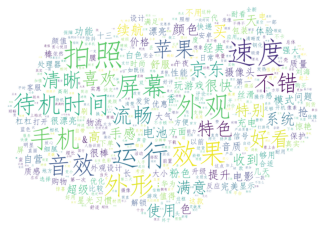

In [332]:
c = Counter(result)
wc = WordCloud(font_path="/home1/liumiao/.local/share/fonts/SIMFANG.TTF", background_color="white", 
               max_font_size=70, max_words=500, prefer_horizontal=1, mask=graph)
wc.generate_from_frequencies(c)

fig = 
plt.axis("off")
plt.imshow(wc)
plt.savefig("./images/iphone13_ktouch_cloud.jpg", dpi=300)


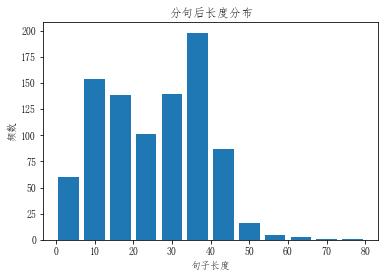

In [296]:
sku_id = 100014352501 
tmp = df_all[(df_all['sku_id'] == 100014352501) | (df_all['sku_id'] == 4270019 )]
after_length = [] 
for each in tmp['split_sentence']:
    after_length.extend(list(map(len, each)))
plt.hist(after_length, bins=12, range=(0, 80), rwidth=0.8)
# plt.hist(tmp['content'].apply(len), bins=12, range=(0, 400), rwidth=0.8)
plt.title("分句后长度分布")
plt.xlabel("句子长度")
plt.ylabel("频数")
plt.savefig("分句后长度.jpg", dpi=300)
plt.show()
# result_list = get_phone_result(df_all, sku_id)      
# res = flatten(result_list)
# res_df = pd.DataFrame(res)
# a_s_d = compute_aspect_scores(sku_id, res_df)
# a_s_d

In [ ]:
t = df_all[df_all['sku_id'] == sku_id]
check_asp = lambda x: any(each['aspect'] == '移动通信' for each in flatten(x))
for row in t[t['model_result'].apply(check_asp)].itertuples():
    print(getattr(row, 'model_result'))
    print(getattr(row, 'content'))
    print()


In [366]:
sku_id = 100014352501

result_list = get_phone_result(df_all, sku_id) 
phone_df = df_all[df_all['sku_id'] == sku_id]
res = flatten(result_list)
res_df = pd.DataFrame(res)
a = res_df.groupby(["aspect", "polarity"]).agg("count").reset_index()
pos = a[a['polarity'] == "正面"].sort_values(by=['target'], ascending=False)
neg = a[a['polarity'] == "负面"].sort_values(by=['target'], ascending=False)

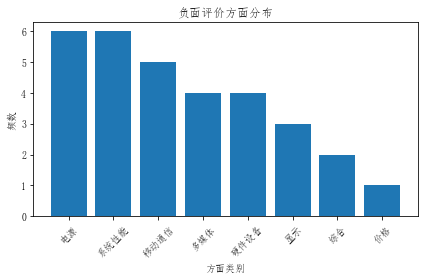

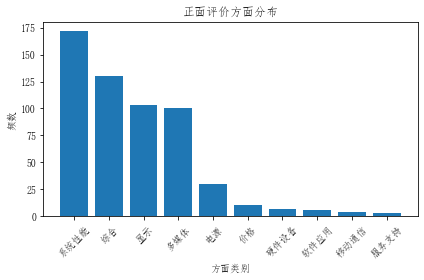

In [345]:
plt.bar(neg.aspect, neg.target)
plt.title("负面评价方面分布")
plt.xticks(rotation=45)
plt.xlabel("方面类别")
plt.ylabel("频数")
plt.tight_layout()
# plt.savefig("./images/k-touch_neg.jpg", dpi=300)
plt.show()

plt.bar(pos.aspect, pos.target)
plt.title("正面评价方面分布")
plt.xticks(rotation=45)
plt.xlabel("方面类别")
plt.ylabel("频数")
plt.tight_layout()
# plt.savefig("./images/k-touch_pos.jpg", dpi=300)
plt.show()

In [397]:
sub_sentence_result = list(chain(*result_list))
sub_sentence = list(chain(*phone_df['split_sentence']))
sub_df = pd.DataFrame(data = {"sub_sent": sub_sentence, "sub_res": sub_sentence_result}, index=range(len(sub_sentence)))
sub_neg = sub_df[sub_df['sub_res'].apply(lambda x: any(each['polarity'] == '负面' for each in x))]
sub_neg

,sub_sent,sub_res
64,唯一不好的就是信号比别的少一格，wifi挺强的！,"[{'target': '信号', 'aspect': '移动通信', 'polarity'..."
65,扬声器声音开到最大没有了层次感，跟个普通喇叭似的。,"[{'target': 'NULL', 'aspect': '硬件设备', 'polarit..."
70,外形外观：很好 很喜欢 老婆拿着顺手屏幕音效：没有噪音 很好 而且很好的音质,"[{'target': '噪音', 'aspect': '多媒体', 'polarity':..."
85,待机时间：待时间不用可以一天时间 刷就不行 一般 不过充电时间快其他特色：刷脸支付支解锁 颜...,"[{'target': '充电时间', 'aspect': '系统性能', 'polarit..."
127,东西很好，就是物流让人很头疼，心累,"[{'target': '物流', 'aspect': '综合', 'polarity': ..."
154,第一次用苹果系列手机，开始还有点不适应iOS系统?,"[{'target': 'iOS系统', 'aspect': '系统性能', 'polari..."
165,送人的很喜欢待机时间：待机基本掉电不多。,"[{'target': '待机时间', 'aspect': '电源', 'polarity'..."
192,屏很好拍照效果：原图一模一样，真实的人才最美运行速度：性能强大待机时间：惟一缺憾就是待机时间不长，,"[{'target': '屏', 'aspect': '显示', 'polarity': '..."
206,拍照效果：拍照保真！,"[{'target': '拍照效果', 'aspect': '多媒体', 'polarity..."
218,运行速度：运行正常没有发热现像待机时间：待机时间很长,"[{'target': '待机', 'aspect': '电源', 'polarity': ..."


In [423]:
res_df

,target,aspect,polarity,prob
0,价格,价格,正面,0.999793
1,声音,多媒体,正面,0.995334
2,操作,系统性能,正面,0.999767
3,外观,显示,正面,0.999265
4,音质,综合,正面,0.998546
...,...,...,...,...
476,字体,系统性能,正面,0.777006
477,NULL,综合,正面,-1.000000
478,画面,显示,正面,0.995183
479,画面,多媒体,正面,0.904791


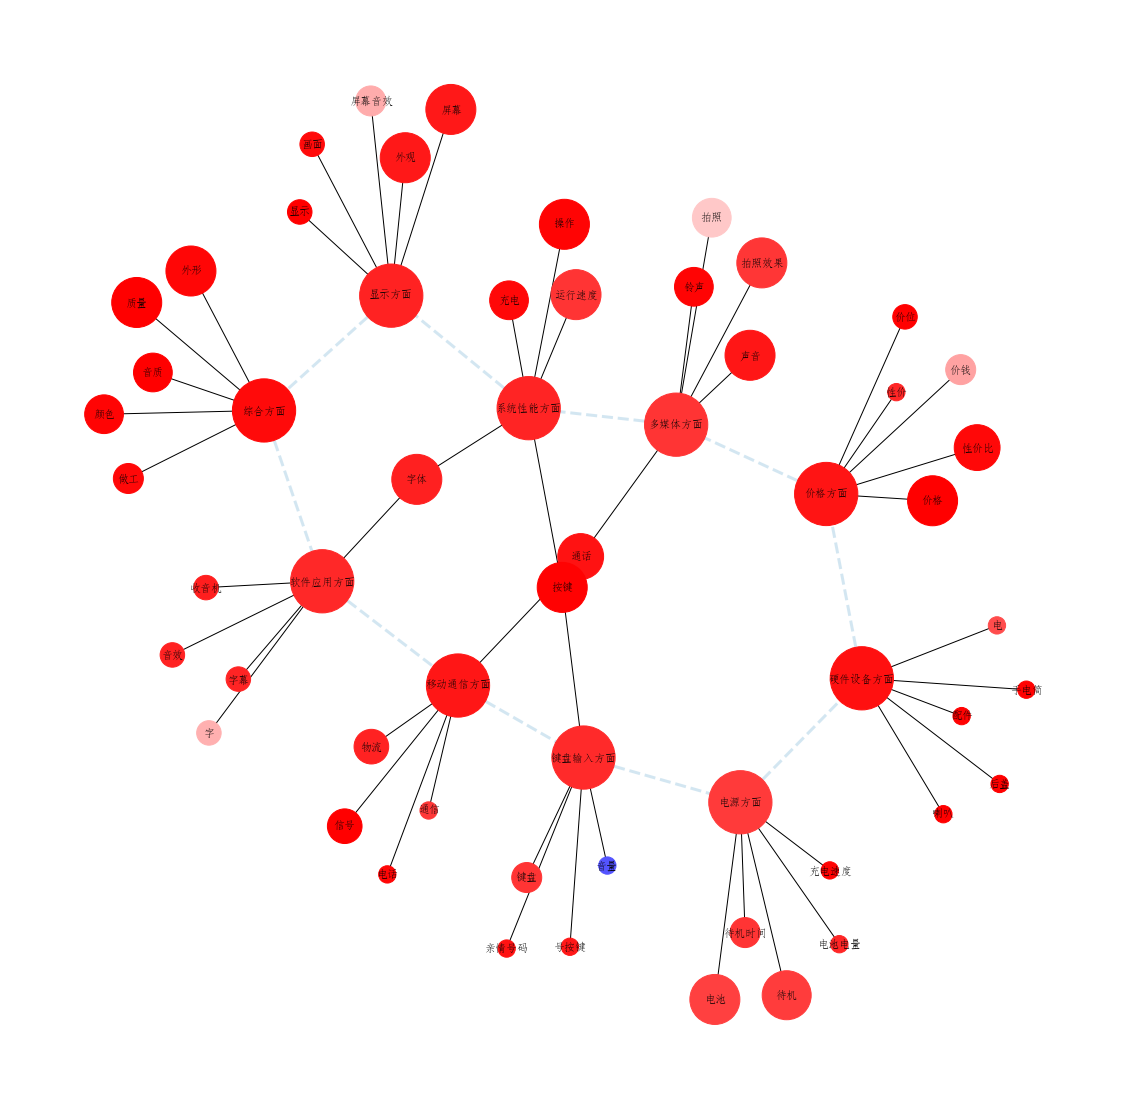

In [441]:
aspect = "系统性能"
g = nx.Graph()


def add_aspect_to_graph(g, aspects, res_df):
    nodes_size_all = {}
    nodes_color_all = {}
    edges = []
    use_aspects = []
    for aspect in aspects:
        asp_df = res_df[(res_df['aspect'] == aspect) & (res_df['target'] != "NULL")]
        t = asp_df['target']
        
        c = Counter(t).most_common(5)
        if len(c) == 0:
            continue
        use_aspects.append(aspect)
        
        # size
        nodes_size = dict(c)
        
        nodes_color = {}
        for target in nodes_size:
            score_sum = 0
            target_asp_df = asp_df[asp_df['target'] == target]
            for idx, row in target_asp_df.iterrows():
                prob = row['prob']
                asp = row['polarity']
                if asp == "正面":
                    score = (prob + 1) / 2
                elif asp == "负面":
                    score = (1 - prob) / 2
                else:
                    score = 0.5
                score_sum += score
            nodes_color[target] = score_sum
            
                
        # color
#         nodes_color = {
# #             k: "#dce4f0" for k in nodes_size
#             n: asp_df.groupby("")
#         }
        
        
        nodes = list(nodes_size.keys()) + [aspect + '方面']
        for node in nodes[:-1]:
            edges.append((node, nodes[-1]))
        nodes_size[aspect + '方面'] = 100
#         nodes_color[aspect + '方面'] = "#a9cfe5"
#         nodes_size_all.update(nodes_size)
        for node in nodes_size:
            nodes_size_all[node] = nodes_size_all.get(node, 0) + nodes_size[node]
        for node in nodes_color:
            nodes_color_all[node] = nodes_color_all.get(node, 0) + nodes_color[node]
    
    main_edges = []
    for i in range(-1, len(use_aspects) - 1):
        main_edges.append((use_aspects[i] + '方面', use_aspects[i + 1] + '方面'))
    # aspect nodes     


    
    g.add_nodes_from(nodes_size_all.keys())
    g.add_edges_from(edges + main_edges)
    return g, nodes_size_all, nodes_color_all, edges, main_edges

sku_id = 4270019 
# sku_id = 100014352501 
result_list = get_phone_result(df_all, sku_id)      
res = flatten(result_list)
res_df = pd.DataFrame(res)
a_s_d = compute_aspect_scores(sku_id, res_df)


aspects = res_df['aspect'].unique()
# aspects = ['系统性能', '电源', '软件应用', '多媒体']
g, nodes_size_all, nodes_color_all, e, me = add_aspect_to_graph(g, aspects, res_df)

plt.figure(figsize=(20, 20))

pos = nx.drawing.layout.kamada_kawai_layout(g)


# nodes
asp_nodes = [i[0] for i in me]

for node in nodes_color_all:
    nodes_color_all[node] = nodes_color_all[node] / nodes_size_all[node]
    
for node in asp_nodes:
    nodes_size_all.pop(node)
node_size=np.clip(np.array(list(nodes_size_all.values())) * 300, 300,2500)

# "#dce4f0"
asp_node_color_map = [a_s_d[each[:-2]] for each in asp_nodes]
nx.draw_networkx_nodes(g, pos, nodes_size_all.keys(), node_size=node_size, 
                       node_color=list(nodes_color_all.values()), cmap="bwr", vmin=0, vmax=1)
nx.draw_networkx_nodes(g, pos, asp_nodes, node_size=4000, node_color=asp_node_color_map, cmap="bwr", vmin=0, vmax=1)

# edges
nx.draw_networkx_edges(g, pos, edgelist=e, width=1)
nx.draw_networkx_edges(
    g, pos, edgelist=me, width=3, alpha=0.5, edge_color="#a9cfe5", style="dashed"
)

# labels
nx.draw_networkx_labels(g, pos, font_size=11)

plt.axis("off")
plt.savefig("images/aspect_target_k-touch.jpg", dpi=300)
plt.show()

In [226]:
asp_nodes = [i[0] for i in me]
asp_nodes

['硬件设备方面',
 '价格方面',
 '多媒体方面',
 '系统性能方面',
 '综合方面',
 '显示方面',
 '软件应用方面',
 '移动通信方面',
 '键盘输入方面',
 '电源方面']

In [22]:
nodes_attr_all

{'运行速度': 56,
 '待机时间': 6,
 '系统': 13,
 '续航': 1,
 '拍照': 19,
 '系统性能方面': 100,
 '电池': 8,
 '待机': 7,
 '电量': 3,
 '电源方面': 100,
 '音效': 2,
 '灵敏度': 1,
 '转换': 1,
 '流畅度': 1,
 '软件应用方面': 100,
 '拍照效果': 45,
 '摄像头': 8,
 '声音': 3,
 '多媒体方面': 100}

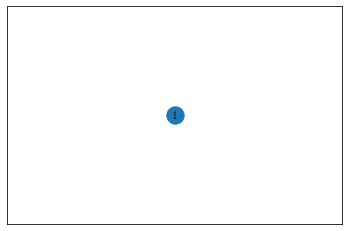

In [116]:
g = nx.Graph()
g.add_node("1")
g.add_node("1")
nx.draw_networkx(g)

In [102]:
node_attr

{'运行速度': 56, '待机时间': 15, '系统': 13, '续航': 7, '拍照': 5, '系统性能': 100}

In [404]:
a = {1: 2}
a.update({1: 3})
a

{1: 3}

In [70]:
wordcloud
Counter(res_df[res_df['aspect'] == "系统性能"]['target']).most_common()

[('运行速度', 56),
 ('待机时间', 15),
 ('系统', 13),
 ('NULL', 8),
 ('续航', 7),
 ('拍照', 5),
 ('手感', 4),
 ('运行', 4),
 ('音效', 4),
 ('拍视频', 3),
 ('快递速度', 3),
 ('游戏', 2),
 ('大小', 2),
 ('人脸识别', 2),
 ('反应速度', 2),
 ('灵敏度', 2),
 ('充电时间', 2),
 ('照相', 2),
 ('A15处理器', 2),
 ('iOS系统', 2),
 ('屏幕音效', 2),
 ('质感', 2),
 ('握持', 1),
 ('运行速', 1),
 ('处理器速度', 1),
 ('丝滑', 1),
 ('A15速度', 1),
 ('扬声器', 1),
 ('响应速度', 1),
 ('人机交互', 1),
 ('自带美颜', 1),
 ('快充', 1),
 ('背景', 1),
 ('充电', 1),
 ('反应', 1),
 ('时间', 1),
 ('屏幕操作', 1),
 ('立体声音', 1),
 ('影像系统', 1),
 ('电池待机', 1),
 ('容量', 1),
 ('操作', 1),
 ('拍照效果', 1),
 ('人像模式', 1),
 ('待机', 1),
 ('待机时', 1),
 ('触摸', 1),
 ('充电速度', 1),
 ('13系统', 1),
 ('电影模式', 1),
 ('模式', 1),
 ('拍照效', 1),
 ('送货速度', 1),
 ('下载速度', 1),
 ('屏幕', 1),
 ('拍照效果速度', 1)]

In [52]:
c = Counter(res_df['target'])
c.most_common(10)

[('声音', 54),
 ('NULL', 44),
 ('字体', 41),
 ('屏幕', 30),
 ('外形', 22),
 ('外观', 21),
 ('运行速度', 17),
 ('价格', 15),
 ('按键', 15),
 ('质量', 12)]